In [1]:
from my_funcs import *

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('spacy.csv')

In [4]:
df.head()

,Statement,Nouns,Spacy_Nouns,Adjectives,Spacy_Adjectives,Verbs,Spacy_Verbs,Veracity,Source,Gender,Disagreements
0,"""Since the Affordable Care Act passed, 90 perc...",3,5,2,1,2,1,True,Alan Krueger,M,Has is not auxiliary -> verb (Growth is in pos...
1,"""We’ve been down this road before—blanket prot...",3,4,2,1,2,1,True,Ben Sasse,M,Blanket is an adj
2,"""Water transportation is the most fuel efficie...",3,5,4,5,2,2,True,Bob Gibbs,M,"Since we don’t consider aux verbs, we should a..."
3,"""More black babies are aborted in NYC than born.""",1,1,1,2,2,2,True,Cynthia Meyer,F,I think more is a determiner
4,"""The legislature was never given the opportuni...",2,3,0,0,4,4,True,Dennis Algiere,M,NaN


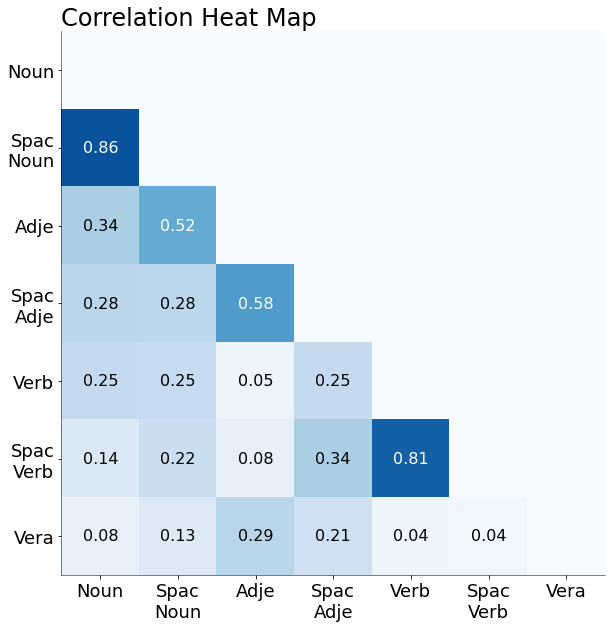

In [5]:
vheatmap(df, 10, 10)

In [6]:
df["word_count"] = df.apply(lambda x: len(x.Statement.split()),axis=1)

In [7]:
pos = ['Nouns', 'Spacy_Nouns', 'Adjectives', 'Spacy_Adjectives',
       'Verbs', 'Spacy_Verbs']

def percentify(df, pos):
    percentage = "_perc"
    for p in pos:
        df[p+percentage] = df.apply(lambda x: x[p]/x.word_count, axis=1)

percentify(df, pos)

In [48]:
human = 'Veracity ~ Nouns + Adjectives + Verbs + Gender + word_count'

In [49]:
model_human = smf.glm(formula=human, data=df, family=sm.families.Binomial()).fit()
model_human.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Generalized Linear Model Regression Results                           
=================================================================================================
Dep. Variable:     ['Veracity[False]', 'Veracity[True]']   No. Observations:                   40
Model:                                               GLM   Df Residuals:                       34
Model Family:                                   Binomial   Df Model:                            5
Link Function:                                     logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -24.940
Date:                                   Wed, 02 Dec 2020   Deviance:                       49.880
Time:                                           20:06:01   Pearson chi2:                     40.8
No. Iterations:                                        4                                         
Covariance Type:                               nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4040      1.236      0.327      0.744      -2.019       2.827
Gender[T.M]     0.9432      0.950      0.993      0.321      -0.918       2.805
Nouns           0.4107      0.411      0.998      0.318      -0.396       1.217
Adjectives     -0.5691      0.343     -1.658      0.097      -1.242       0.104
Verbs           0.2847      0.467      0.609      0.542      -0.631       1.200
word_count     -0.1080      0.093     -1.155      0.248      -0.291       0.075
===============================================================================
"""

In [10]:
vif(human, df)

,VIF Factor,features
0,13.407808,Intercept
1,1.133910,Gender[T.M]
2,2.315088,Nouns
3,1.192404,Adjectives
4,2.547864,Verbs
5,4.447350,word_count


In [40]:
spacy = 'Veracity ~ Spacy_Nouns + Spacy_Adjectives + Spacy_Verbs + Gender + word_count'

In [41]:
model_spacy = smf.glm(formula=spacy, data=df, family=sm.families.Binomial()).fit()
model_spacy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Generalized Linear Model Regression Results                           
=================================================================================================
Dep. Variable:     ['Veracity[False]', 'Veracity[True]']   No. Observations:                   40
Model:                                               GLM   Df Residuals:                       34
Model Family:                                   Binomial   Df Model:                            5
Link Function:                                     logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -26.178
Date:                                   Wed, 02 Dec 2020   Deviance:                       52.356
Time:                                           20:05:32   Pearson chi2:                     40.0
No. Iterations:                                        4                                         
Covariance Type:                               nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.8601      1.143      0.752      0.452      -1.380       3.101
Gender[T.M]          0.5646      0.881      0.641      0.522      -1.163       2.292
Spacy_Nouns          0.0434      0.267      0.163      0.871      -0.480       0.566
Spacy_Adjectives    -0.3924      0.332     -1.182      0.237      -1.043       0.258
Spacy_Verbs         -0.0743      0.341     -0.218      0.828      -0.742       0.594
word_count          -0.0424      0.069     -0.614      0.539      -0.178       0.093
====================================================================================
"""

In [13]:
spacy_perc = 'Veracity ~ Spacy_Nouns_perc + Spacy_Adjectives_perc + Spacy_Verbs_perc + Gender + word_count'

In [14]:
model_spacy_perc = smf.glm(formula=spacy_perc, data=df, family=sm.families.Binomial()).fit()
model_spacy_perc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Generalized Linear Model Regression Results                           
=================================================================================================
Dep. Variable:     ['Veracity[False]', 'Veracity[True]']   No. Observations:                   40
Model:                                               GLM   Df Residuals:                       34
Model Family:                                   Binomial   Df Model:                            5
Link Function:                                     logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -26.226
Date:                                   Wed, 02 Dec 2020   Deviance:                       52.452
Time:                                           18:43:25   Pearson chi2:                     40.3
No. Iterations:                                        4                                         
Covariance Type:                               nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.5629      1.887      0.828      0.408      -2.136       5.262
Gender[T.M]               0.5006      0.883      0.567      0.571      -1.230       2.231
Spacy_Nouns_perc          0.3853      3.836      0.100      0.920      -7.133       7.904
Spacy_Adjectives_perc    -6.0097      5.117     -1.175      0.240     -16.038       4.018
Spacy_Verbs_perc         -3.3982      5.889     -0.577      0.564     -14.941       8.145
word_count               -0.0652      0.049     -1.341      0.180      -0.160       0.030
=========================================================================================
"""

In [15]:
vif(spacy_perc, df)

,VIF Factor,features
0,30.799779,Intercept
1,1.048350,Gender[T.M]
2,1.275957,Spacy_Nouns_perc
3,1.361586,Spacy_Adjectives_perc
4,1.220794,Spacy_Verbs_perc
5,1.187361,word_count


In [16]:
human_perc = 'Veracity ~ Nouns_perc + Adjectives_perc + Verbs_perc + Gender + word_count'

In [17]:
model_human_perc = smf.glm(formula=human_perc, data=df, family=sm.families.Binomial()).fit()
model_human_perc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Generalized Linear Model Regression Results                           
=================================================================================================
Dep. Variable:     ['Veracity[False]', 'Veracity[True]']   No. Observations:                   40
Model:                                               GLM   Df Residuals:                       34
Model Family:                                   Binomial   Df Model:                            5
Link Function:                                     logit   Scale:                          1.0000
Method:                                             IRLS   Log-Likelihood:                -25.294
Date:                                   Wed, 02 Dec 2020   Deviance:                       50.589
Time:                                           18:43:25   Pearson chi2:                     41.0
No. Iterations:                                        4                                         
Covariance Type:                               nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6047      2.470     -0.245      0.807      -5.446       4.236
Gender[T.M]         0.8662      0.941      0.920      0.357      -0.979       2.711
Nouns_perc          8.0918      6.972      1.161      0.246      -5.573      21.757
Adjectives_perc    -7.7422      5.008     -1.546      0.122     -17.558       2.074
Verbs_perc          3.6329      7.722      0.470      0.638     -11.503      18.769
word_count         -0.0582      0.050     -1.173      0.241      -0.155       0.039
===================================================================================
"""